In [1]:
from pyspark.sql.functions import col
from pyspark.sql.functions import explode
from pyspark.sql.functions import count
from pyspark.sql.functions import regexp_replace
from pyspark.sql.functions import when, array_contains, coalesce, udf, StringType

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("My Spark Application") \
    .config("spark.some.config.option", "config-value") \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/08/24 20:39:38 WARN Utils: Your hostname, DESKTOP-I232434 resolves to a loopback address: 127.0.1.1; using 172.26.135.140 instead (on interface eth0)
23/08/24 20:39:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/24 20:39:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [13]:
df.head(100)

[Row(event_time='2019-11-01 00:00:00 UTC', event_type='view', product_id='1003461', category_id='2053013555631882655', category_code='electronics.smartphone', brand='xiaomi', price='489.07', user_id='520088904', user_session='4d3b30da-a5e4-49df-b1a8-ba5943f1dd33'),
 Row(event_time='2019-11-01 00:00:00 UTC', event_type='view', product_id='5000088', category_id='2053013566100866035', category_code='appliances.sewing_machine', brand='janome', price='293.65', user_id='530496790', user_session='8e5f4f83-366c-4f70-860e-ca7417414283'),
 Row(event_time='2019-11-01 00:00:01 UTC', event_type='view', product_id='17302664', category_id='2053013553853497655', category_code=None, brand='creed', price='28.31', user_id='561587266', user_session='755422e7-9040-477b-9bd2-6a6e8fd97387'),
 Row(event_time='2019-11-01 00:00:01 UTC', event_type='view', product_id='3601530', category_id='2053013563810775923', category_code='appliances.kitchen.washer', brand='lg', price='712.87', user_id='518085591', user_sess

In [14]:
df.show()

+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+
|2019-11-01 00:00:...|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|
|2019-11-01 00:00:...|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...|
|2019-11-01 00:00:...|      view|  17302664|2053013553853497655|                null|   creed| 28.31|561587266|755422e7-9040-477...|
|2019-11-01 00:00:...|      view|   3601530|2053013563810775923|appliances.kitche...|      lg|712.87|518085591|3bfb58cd-7892-48c...|
|2019-11-01 00:00:...|      view|   1004775|2053013555631882655|elect

In [15]:
# df의 스키마 정보 확인하기
df.printSchema()

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)



In [16]:
df.groupBy("event_type").count().show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  180364|
|      view|11915584|
|      cart|  173718|
+----------+--------+



In [11]:
df.count()

67501979

In [12]:
df.groupBy("user_id").count().show()

+---------+-----+
|  user_id|count|
+---------+-----+
|512416379|  166|
|518045858|   18|
|514173771|  239|
|540806126|   48|
|549697474|   96|
|551128812|    9|
|566282003|    1|
|557839915|    8|
|555708149|  243|
|534474818|   18|
|542474856|   92|
|513398520|    9|
|553452650|   23|
|519310057|   14|
|515806073|    3|
|562269684|    4|
|516879649|   75|
|513044730|  228|
|551743559|   49|
|544957821|    7|
+---------+-----+
only showing top 20 rows



In [15]:
df.groupBy("user_id","user_session").count().show()

+---------+--------------------+-----+
|  user_id|        user_session|count|
+---------+--------------------+-----+
|520772685|816a59f3-f5ae-4cc...|   17|
|513200477|742aba02-727b-4d1...|    8|
|553802615|e09684bb-0c95-4f6...|    2|
|542346595|75c35801-ce60-44b...|    1|
|558726315|e43aa696-aefc-406...|    1|
|563227152|1e10d7be-b609-47a...|    1|
|565802271|5d1646b8-f999-40e...|    4|
|566282650|1d5e038a-3b62-439...|    1|
|542640486|22d25da8-616f-46d...|    9|
|534313202|94b37d8e-fc79-4ad...|    4|
|555659079|2ad84784-d578-4c0...|    1|
|514285021|6b2b63c5-9750-4c3...|    2|
|545948530|5169cc52-096b-45c...|    4|
|564557545|063368b3-624c-4f6...|    1|
|536344811|fbcbba3b-0cca-452...|    1|
|565609319|e55f5f4b-ecf1-42f...|    1|
|566286011|a92b0898-3264-4c8...|    1|
|538321055|7eed4ca4-7d16-4a7...|    1|
|565801830|a92bf09d-522c-4e8...|    1|
|559084696|08a42c83-853e-4ad...|   10|
+---------+--------------------+-----+
only showing top 20 rows



In [37]:
df.select("user_id").distinct().count()

3696117

In [17]:
df.createOrReplaceTempView("sh")

In [18]:
df2 = spark.sql("SELECT * FROM sh")

In [19]:
# SQL 쿼리를 사용하여 데이터 조회
query = "SELECT * FROM sh where user_id='526160987'"
result = spark.sql(query)

In [19]:
result.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2019-11-02 01:14:...|      view|   9800515|2053013554071601477|                null|   null|  98.84|526160987|bf47ad7d-e308-462...|
|2019-11-02 01:14:...|      view|   9800610|2053013554071601477|                null|   null| 128.68|526160987|bf47ad7d-e308-462...|
|2019-11-02 01:15:...|      view|   9800613|2053013554071601477|                null|   null| 167.29|526160987|bf47ad7d-e308-462...|
|2019-11-02 13:40:...|      view|   1307466|2053013558920217191|  computers.notebook|    msi|1549.07|526160987|3f3951e9-a13d-448...|
|2019-11-02 13:41:...|      view|   1307466|2053013558920217191|  com

In [22]:
df.groupBy("category_code").count().show()

+--------------------+-------+
|       category_code|  count|
+--------------------+-------+
|    computers.ebooks|  48065|
|apparel.shoes.sli...|   5613|
|computers.periphe...|  88325|
|electronics.video...|  22940|
|appliances.kitche...|  18906|
|     sport.snowboard|  17936|
|electronics.camer...|  65828|
|       apparel.shirt|  51095|
|electronics.audio...|1816877|
|appliances.kitche...| 160932|
|appliances.kitche...|  75128|
|  electronics.tablet| 492497|
|appliances.kitche...| 186212|
|auto.accessories....|  49902|
|apparel.shoes.moc...|  12525|
|       apparel.jeans|  52966|
|computers.periphe...| 211342|
|furniture.living_...| 551642|
| stationery.cartrige|  12778|
|furniture.kitchen...| 188721|
+--------------------+-------+
only showing top 20 rows



In [20]:
df.groupBy("category_code").count().show(n=1000, truncate=False)

+--------------------------------------+--------+
|category_code                         |count   |
+--------------------------------------+--------+
|apparel.shoes.slipons                 |5613    |
|computers.ebooks                      |48065   |
|computers.peripherals.keyboard        |88325   |
|appliances.kitchen.coffee_grinder     |18906   |
|electronics.video.projector           |22940   |
|sport.snowboard                       |17936   |
|electronics.camera.video              |65828   |
|apparel.shirt                         |51095   |
|electronics.audio.headphone           |1816877 |
|appliances.kitchen.dishwasher         |160932  |
|appliances.kitchen.juicer             |75128   |
|electronics.tablet                    |492497  |
|appliances.kitchen.hob                |186212  |
|auto.accessories.radar                |49902   |
|apparel.shoes.moccasins               |12525   |
|apparel.jeans                         |52966   |
|computers.peripherals.monitor         |211342  |


In [20]:
# '삼성' 브랜드 중 카테고리 별 평균 가격을 내림차순 정렬로 나타낸 쿼리
query = "SELECT category_code, AVG(price) AS avg_price FROM sh where brand = 'samsung' group by category_code order by avg_price DESC"
result = spark.sql(query)

result.show(n = 100, truncate=False)

+--------------------------------------+------------------+
|category_code                         |avg_price         |
+--------------------------------------+------------------+
|appliances.kitchen.refrigerators      |765.5886124625746 |
|electronics.video.tv                  |584.8201462953788 |
|appliances.environment.air_conditioner|467.9606510416667 |
|appliances.kitchen.oven               |457.54720202485066|
|appliances.kitchen.dishwasher         |428.14698113207584|
|appliances.kitchen.washer             |417.6817589495018 |
|appliances.kitchen.hob                |338.4825939393936 |
|electronics.smartphone                |336.5630980976689 |
|electronics.audio.acoustic            |330.657232597623  |
|computers.peripherals.monitor         |263.2301986239132 |
|electronics.clocks                    |262.9001914557759 |
|electronics.tablet                    |245.44677927178236|
|appliances.kitchen.hood               |185.11667877906976|
|computers.components.hdd              |

# 전처리에 대한 처리

- category_code, brand가 동시에 null값인 것만 삭제한다.

In [21]:
query = "SELECT count(*) FROM sh where category_code is null and brand is null"
result2 = spark.sql(query)

result2.show()

+--------+
|count(1)|
+--------+
| 1022993|
+--------+



In [23]:
query = "SELECT count(*) FROM sh where category_code is not null"
result = spark.sql(query)

result.show()

+--------+
|count(1)|
+--------+
|45603808|
+--------+



In [24]:
# SQL 쿼리를 사용하여 데이터 조회
query = "SELECT * FROM sh where user_id='526160987'"
result = spark.sql(query)

result.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2019-11-02 01:14:...|      view|   9800515|2053013554071601477|                null|   null|  98.84|526160987|bf47ad7d-e308-462...|
|2019-11-02 01:14:...|      view|   9800610|2053013554071601477|                null|   null| 128.68|526160987|bf47ad7d-e308-462...|
|2019-11-02 01:15:...|      view|   9800613|2053013554071601477|                null|   null| 167.29|526160987|bf47ad7d-e308-462...|
|2019-11-02 13:40:...|      view|   1307466|2053013558920217191|  computers.notebook|    msi|1549.07|526160987|3f3951e9-a13d-448...|
|2019-11-02 13:41:...|      view|   1307466|2053013558920217191|  com

In [ ]:
result

In [25]:
# SQL 쿼리를 사용하여 데이터 조회
query = "SELECT category_code FROM sh where user_id='526160987'"
result = spark.sql(query)

result.show()

+--------------------+
|       category_code|
+--------------------+
|                null|
|                null|
|                null|
|  computers.notebook|
|  computers.notebook|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
|computers.periphe...|
+--------------------+
only showing top 20 rows



In [22]:
from pyspark.sql.functions import split
# "."을 기준으로 칼럼 나누기
split_col = split(df["category_code"], "\\.")
df = df.withColumn("major", split_col.getItem(0))
df = df.withColumn("Intermediate", split_col.getItem(1))
df = df.withColumn("minor", split_col.getItem(2))

df.show()

+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+-----------+--------------+-------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand| price|  user_id|        user_session|      major|  Intermediate|        minor|
+--------------------+----------+----------+-------------------+--------------------+--------+------+---------+--------------------+-----------+--------------+-------------+
|2019-11-01 00:00:...|      view|   1003461|2053013555631882655|electronics.smart...|  xiaomi|489.07|520088904|4d3b30da-a5e4-49d...|electronics|    smartphone|         null|
|2019-11-01 00:00:...|      view|   5000088|2053013566100866035|appliances.sewing...|  janome|293.65|530496790|8e5f4f83-366c-4f7...| appliances|sewing_machine|         null|
|2019-11-01 00:00:...|      view|  17302664|2053013553853497655|                null|   creed| 28.31|561587266|755422e7-9040-477..

# EDA

In [28]:
# 고유 회원 수 확인 및 콤마 추가
unique_user_count = df.select("user_id").distinct().count()
formatted_count = "{:,}".format(unique_user_count)
print("고유 회원 수:", formatted_count)

고유 회원 수: 3,696,117


In [37]:
df.show(truncate = False)

+-----------------------+----------+----------+-------------------+--------------------------------+--------+------+---------+------------------------------------+
|event_time             |event_type|product_id|category_id        |category_code                   |brand   |price |user_id  |user_session                        |
+-----------------------+----------+----------+-------------------+--------------------------------+--------+------+---------+------------------------------------+
|2019-11-01 00:00:00 UTC|view      |1003461   |2053013555631882655|electronics.smartphone          |xiaomi  |489.07|520088904|4d3b30da-a5e4-49df-b1a8-ba5943f1dd33|
|2019-11-01 00:00:00 UTC|view      |5000088   |2053013566100866035|appliances.sewing_machine       |janome  |293.65|530496790|8e5f4f83-366c-4f70-860e-ca7417414283|
|2019-11-01 00:00:01 UTC|view      |17302664  |2053013553853497655|null                            |creed   |28.31 |561587266|755422e7-9040-477b-9bd2-6a6e8fd97387|
|2019-11-01 00:0

# 전환율 확인

In [23]:
# user_id별로 user_id와 view 횟수 조회하기
query = "SELECT user_id, count(*) AS cnt_view FROM sh WHERE event_type = 'view' group by user_id order by cnt_view DESC"
result_view = spark.sql(query)

result_view.show()

+---------+--------+
|  user_id|cnt_view|
+---------+--------+
|512475445|    2738|
|568778435|    2069|
|512365995|    1459|
|559249905|    1216|
|539585530|     966|
|531537488|     965|
|518373642|     908|
|564749784|     898|
|558035852|     894|
|567475167|     866|
|514702154|     859|
|541327921|     817|
|516795601|     805|
|513778820|     804|
|514998287|     792|
|514649263|     783|
|561633787|     782|
|512401084|     745|
|546309572|     735|
|515113432|     724|
+---------+--------+
only showing top 20 rows



In [24]:
# user_id별로 user_id와 cart 횟수 조회하기
query = "SELECT user_id, count(*) AS cnt_cart FROM sh WHERE event_type = 'cart' group by user_id order by cnt_cart DESC"
result_cart = spark.sql(query)

result_cart.show()

+---------+--------+
|  user_id|cnt_cart|
+---------+--------+
|564068124|     290|
|538042220|     168|
|562538224|     125|
|565782150|     122|
|564133858|      89|
|563889375|      85|
|549030056|      82|
|541328903|      81|
|512792872|      69|
|549109608|      66|
|531261934|      66|
|521350556|      65|
|557254614|      63|
|555561884|      60|
|566195962|      60|
|535795876|      59|
|558728074|      54|
|543595420|      53|
|520670468|      51|
|547080420|      50|
+---------+--------+
only showing top 20 rows



In [25]:
# 가장 접속이 많은 회원을 기준으로 내림차순 정렬로 user_id와 접속 횟수 확인하기
query = "SELECT user_id, count(*) AS cnt_purchase from sh where event_type = 'purchase' group by user_id order by cnt_purchase DESC"
result_purchase = spark.sql(query)

result_purchase.show()

+---------+------------+
|  user_id|cnt_purchase|
+---------+------------+
|564068124|         387|
|566195962|         133|
|549109608|          65|
|535327520|          64|
|557254614|          59|
|564769842|          57|
|558186321|          54|
|515644853|          51|
|551801600|          50|
|551140089|          50|
|555561884|          49|
|563889375|          49|
|513320236|          48|
|512386086|          46|
|566307865|          46|
|564133858|          46|
|566619988|          46|
|531954737|          46|
|543595420|          45|
|562993718|          43|
+---------+------------+
only showing top 20 rows



In [26]:
# result_view, result_cart, result_purchase 데이터프레임을 SQL 임시 테이블로 등록
result_view.createOrReplaceTempView("result_view")
result_cart.createOrReplaceTempView("result_cart")
result_purchase.createOrReplaceTempView("result_purchase")

In [27]:
query = """
SELECT v.user_id, v.cnt_view, c.cnt_cart, p.cnt_purchase
FROM result_view v
JOIN result_cart c ON v.user_id = c.user_id
JOIN result_purchase p ON v.user_id = p.user_id
"""
result_combined = spark.sql(query)

result_combined.show()


+---------+--------+--------+------------+
|  user_id|cnt_view|cnt_cart|cnt_purchase|
+---------+--------+--------+------------+
|555708149|      60|       5|           2|
|563293492|      31|       1|           2|
|516308340|      48|       5|           3|
|566302095|       1|       2|           1|
|536583068|      15|       1|           3|
|519066075|      41|       3|           5|
|530764630|       4|       1|           1|
|532451183|      18|       3|           2|
|522929556|      19|      15|          12|
|514385719|     102|       6|          23|
|566088492|      20|       2|           2|
|529553077|       5|       1|           2|
|562665439|      12|       1|           1|
|515454449|       7|       4|           3|
|555771862|      63|       2|          38|
|538771058|       5|       1|           1|
|548752690|       4|       1|           1|
|566352788|       8|       2|           2|
|515962636|      12|       1|           2|
|536866041|      27|       9|           2|
+---------+

# 카테고리 별 상품 개수

In [28]:
# 시작 시간 기록
import time
start_time = time.time()

# result_view, result_cart, result_purchase 를 조인해서 user_id 별 view, cart, purchase 수 확인하기
query = """
SELECT category_code, count(*) AS cnt
FROM sh
GROUP BY category_code
ORDER BY cnt DESC
"""
result_total = spark.sql(query)

result_total.show(n=100,truncate=False)
# 작업 완료 시간 기록
end_time = time.time()
# 작업 실행 시간 계산
execution_time = end_time - start_time
print("작업 실행 시간:", execution_time, "초")

+--------------------------------------+-------+
|category_code                         |cnt    |
+--------------------------------------+-------+
|null                                  |4057131|
|electronics.smartphone                |3112665|
|electronics.clocks                    |372828 |
|electronics.video.tv                  |366049 |
|computers.notebook                    |362154 |
|apparel.shoes                         |333306 |
|electronics.audio.headphone           |313260 |
|appliances.kitchen.refrigerators      |245122 |
|appliances.kitchen.washer             |241965 |
|appliances.environment.vacuum         |236026 |
|computers.desktop                     |129268 |
|furniture.living_room.cabinet         |118028 |
|furniture.bedroom.bed                 |112486 |
|apparel.shoes.keds                    |111886 |
|auto.accessories.player               |97524  |
|furniture.living_room.sofa            |89985  |
|electronics.tablet                    |88240  |
|construction.tools.

# 카테고리 별 판매 상품 개수

In [29]:
# 시작 시간 기록
import time
start_time = time.time()

# result_view, result_cart, result_purchase 를 조인해서 user_id 별 view, cart, purchase 수 확인하기
query = """
SELECT category_code, count(*) AS cnt
FROM sh
WHERE event_type = 'purchase'
GROUP BY category_code
ORDER BY cnt DESC
LIMIT 10
"""
result_total = spark.sql(query)

result_total.show(n=100,truncate=False)
# 작업 완료 시간 기록
end_time = time.time()
# 작업 실행 시간 계산
execution_time = end_time - start_time
print("작업 실행 시간:", execution_time, "초")

+--------------------------------+-----+
|category_code                   |cnt  |
+--------------------------------+-----+
|electronics.smartphone          |78254|
|null                            |50657|
|electronics.audio.headphone     |7454 |
|electronics.video.tv            |5130 |
|electronics.clocks              |4224 |
|appliances.kitchen.washer       |3522 |
|computers.notebook              |3317 |
|appliances.environment.vacuum   |2565 |
|appliances.kitchen.refrigerators|2126 |
|apparel.shoes                   |1513 |
+--------------------------------+-----+

작업 실행 시간: 11.464547634124756 초


In [30]:
result_total.createOrReplaceTempView("result_total")

In [ ]:
pip install matplotlib

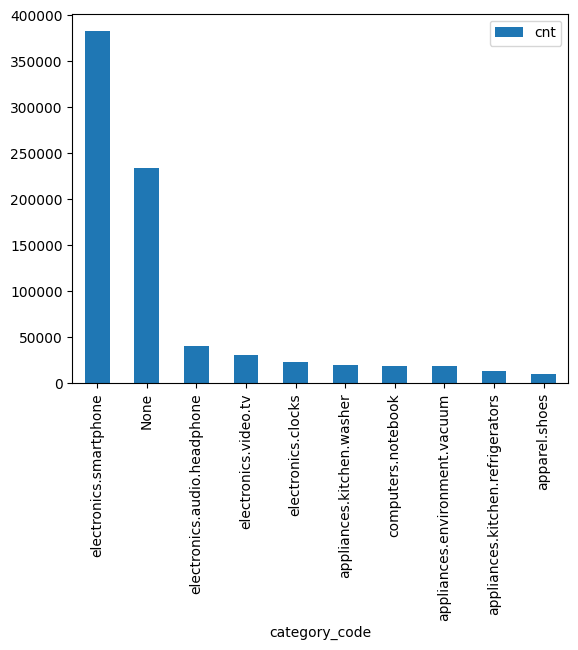

In [60]:
# 라이브러리 가져오기
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# 데이터 프레임 생성
# result_total = spark.createDataFrame(result_total)

# 막대 그래프 출력
result_total.toPandas().plot(kind="bar", x="category_code", y="cnt")
plt.show()

# 브랜드 별 상품 개수 (상위 10개)

In [31]:
# 시작 시간 기록
import time
start_time = time.time()

# result_view, result_cart, result_purchase 를 조인해서 user_id 별 view, cart, purchase 수 확인하기
query = """
SELECT brand, count(*) AS cnt
FROM sh
GROUP BY brand
ORDER BY cnt DESC
LIMIT 10
"""
result_total = spark.sql(query)

result_total.show(n=100,truncate=False)
# 작업 완료 시간 기록
end_time = time.time()
# 작업 실행 시간 계산
execution_time = end_time - start_time
print("작업 실행 시간:", execution_time, "초")

+--------+-------+
|brand   |cnt    |
+--------+-------+
|null    |1726534|
|samsung |1429123|
|apple   |1180277|
|xiaomi  |843987 |
|huawei  |273904 |
|lucente |187626 |
|cordiant|179698 |
|lg      |168707 |
|bosch   |160061 |
|oppo    |153036 |
+--------+-------+

작업 실행 시간: 12.99484133720398 초


In [34]:
result_total.write.format("csv").option("header", "true").mode("overwrite").save("./csv")


# 데이터 분류 기준

## 1. category_code: 대 > 중 > 소 컬럼 나누기

## 2. 전환 유형 Fix 하기
### ① view -> cart (cart 전환 후 이탈 고객)
### ② cart -> purchase (최종 구매 전환 고객)
### ③ view -> purchase (cart 없이 바로 구매 전환한 고객)

In [14]:
spark = (
    SparkSession.builder.appName("BigQuery with PySpark")
    .config(
        "spark.jars",
        "gs://spark-lib/bigquery/spark-bigquery-latest_2.12.jar"
    )
    .getOrCreate()
)result.write.format('bigquery') \
  .option('table', 'unique-hour-395905.shopping_mall.shop_log') \
  .option("credentialsFile", "/home/hadoop/다운로드/playdata-2-1e60a2f219de.json") \
  .save()

SyntaxError: invalid syntax (670820051.py, line 8)

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType, StructType, StructField

In [17]:
# PySpark 세션을 생성합니다. BigQuery와 연결을 설정하기 위한 구성을 추가합니다.
spark = SparkSession.builder \
    .appName("BigQuery export") \
    .config("spark.jars", "C:/workspace/spark-bigquery_2.12.jar") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()

23/08/24 19:50:24 ERROR SparkContext: Failed to add C:/workspace/spark-bigquery_2.12.jar to Spark environment
org.apache.hadoop.fs.UnsupportedFileSystemException: No FileSystem for scheme "C"
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3443)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3466)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:174)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3574)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3521)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:540)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:365)
	at org.apache.spark.SparkContext.checkRemoteJarFile$1(SparkContext.scala:1987)
	at org.apache.spark.SparkContext.addJar(SparkContext.scala:2031)
	at org.apache.spark.SparkContext.$anonfun$new$12(SparkContext.scala:507)
	at org.apache.spark.SparkContext.$anonfun$new$12$adapted(SparkContext.scala:507)
	at scala.collection.m

In [ ]:
data = spark.read\
    .format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("C:\\workspace\\2019-Nov.csv")

In [27]:
spark.stop()

In [53]:
from pyspark.sql import SparkSession
from google.cloud import storage

# 구글 클라우드 스토리지 클라이언트 인스턴스 생성
storage_client = storage.Client.from_service_account_json('/home/oh/spark/unique-hour-395905-146673f22a80.json')

# BigQuery와 연결을 설정하기 위한 구성과 함께 PySpark 세션을 생성합니다.
spark = SparkSession.builder \
    .appName("BigQuery export") \
    .config("spark.jars", "/home/oh/spark/pyspark/lib/python3.10/site-packages/pyspark/jars/spark-bigquery-latest.jar") \
    .config('spark.hadoop.google.cloud.auth.service.account.json.keyfile', '/home/oh/spark/unique-hour-395905-146673f22a80.json') \
    .getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

23/08/24 18:42:45 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
23/08/24 18:42:45 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


In [58]:
result_total.show()

+--------+-------+
|   brand|    cnt|
+--------+-------+
|    null|1726534|
| samsung|1429123|
|   apple|1180277|
|  xiaomi| 843987|
|  huawei| 273904|
| lucente| 187626|
|cordiant| 179698|
|      lg| 168707|
|   bosch| 160061|
|    oppo| 153036|
+--------+-------+



In [66]:
result_total.select("*").toPandas()

,brand,cnt
0,None,1726534
1,samsung,1429123
2,apple,1180277
3,xiaomi,843987
4,huawei,273904
5,lucente,187626
6,cordiant,179698
7,lg,168707
8,bosch,160061
9,oppo,153036


In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import pyarrow

# GCP 서비스 계정 키 파일 경로
key_path = "/home/oh/spark/unique-hour-395905-146673f22a80.json"

# 프로젝트 및 데이터셋 ID
project_id = "unique-hour-395905"
dataset_id = "unique-hour-395905.shopping_mall"

# BigQuery 클라이언트 설정
client = bigquery.Client.from_service_account_json(key_path)

# 데이터 프레임을 팬더스 데이터 프레임으로 변환(데이터 시리얼라이즈)
pandas_df = result_total.select("*").toPandas()

# BigQuery로 데이터 프레임 전송
table_id = "unique-hour-395905.shopping_mall.oh"

job_config = bigquery.LoadJobConfig(
    # 스키마 자동 감지
    schema=[],
    autodetect=True,
    # 데이터 쓰기 방식 선택
    write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE,  # 이전 테이블 데이터 대체
)

# BigQuery에 데이터 프레임 불러오기
job = client.load_table_from_dataframe(
    pandas_df, table_id, job_config=job_config
)

# 작업 완료 시간 기록
job.result()